In [62]:
# importing the dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from numpy import asarray
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from tensorflow.keras.models import load_model
import os
from sklearn.model_selection import train_test_split

In [63]:
# Data Preprocessing
DATA_PATH = os.path.join('dataset')

digits = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

no_labels = 10

In [64]:
# data and label mapping
X, y = [], []
for label in range(no_labels):
    path = os.path.join(DATA_PATH, str(label))
    for file in os.listdir(path):
        image = Image.open(path + '/' + file)
        data = asarray(image)
        X.append(data)
        y.append(label)

In [65]:
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

(1075, 128, 128) (1075,)


In [66]:
# train and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [67]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1021, 128, 128) (54, 128, 128) (1021,) (54,)


In [68]:
# scaling the values (normalization)
X_train = X_train / 255
X_test = X_test / 255

In [131]:
# Building Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128, 128)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),
])

In [132]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
)

In [133]:
#training the neural network
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 11ms/step - loss: 3.2796 - accuracy: 0.2145
Epoch 2/50
32/32 [==============================] - 0s 12ms/step - loss: 1.6210 - accuracy: 0.4182
Epoch 3/50
32/32 [==============================] - 0s 12ms/step - loss: 1.2801 - accuracy: 0.5847
Epoch 4/50
32/32 [==============================] - 0s 12ms/step - loss: 1.0511 - accuracy: 0.6474
Epoch 5/50
32/32 [==============================] - 0s 11ms/step - loss: 0.9091 - accuracy: 0.7081
Epoch 6/50
32/32 [==============================] - 0s 12ms/step - loss: 0.7801 - accuracy: 0.7395
Epoch 7/50
32/32 [==============================] - 0s 11ms/step - loss: 0.7102 - accuracy: 0.7708
Epoch 8/50
32/32 [==============================] - 0s 11ms/step - loss: 0.5990 - accuracy: 0.8227
Epoch 9/50
32/32 [==============================] - 0s 12ms/step - loss: 0.5226 - accuracy: 0.8413
Epoch 10/50
32/32 [==============================] - 0s 11ms/step - loss: 0.5017 - accuracy: 0.8541
Epoch 11/

In [134]:
model.save('dense_NN.h5')

In [69]:
model = load_model('dense_NN.h5')

In [70]:
loss, accuracy = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.1370 - accuracy: 0.9815


In [71]:
# Making prediction on X_test
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [72]:
# Converting the prediction probabilities to class label for all test cases
y_pred_labels = [np.argmax(i) for i in  y_pred]

In [73]:
# Building Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  0  0  5  1  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  4]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'predicted Labels')

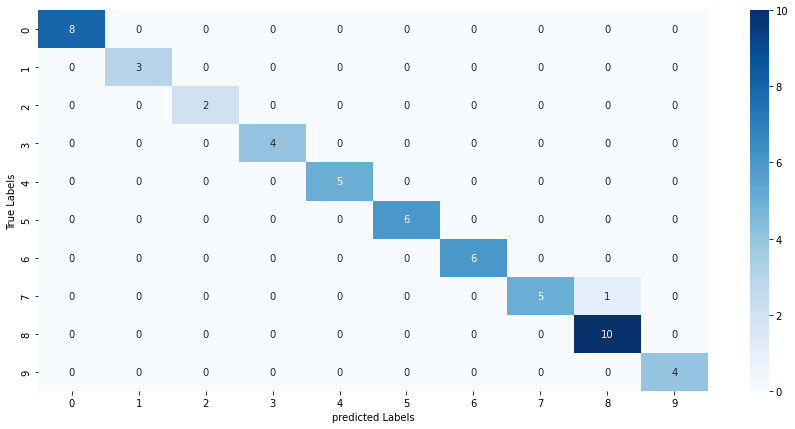

In [74]:
# Ploting Confusion Matrix
plt.figure(figsize=(15, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel("predicted Labels")

In [75]:
accuracy_score(y_test, y_pred_labels)
print("Dense NN Accuracy : %.2f%%" % (accuracy * 100))

Dense NN Accuracy : 98.15%


In [76]:
from tensorflow.keras.applications.resnet50 import decode_predictions
from keras.optimizers import Adam, SGD
from keras.models import Sequential,Model,load_model
from keras.layers import BatchNormalization, Activation, MaxPooling2D
from keras.layers import AveragePooling2D, Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.utils import np_utils

In [141]:
cnn_model = Sequential()
cnn_model.add(Conv2D(16, (2,2), input_shape=(128, 128, 1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
cnn_model.add(Conv2D(32, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
cnn_model.add(Conv2D(64, (5,5), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(10, activation='softmax'))
adam = Adam(learning_rate=0.001)
cnn_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [142]:
train_images = np.reshape(X_train, (X_train.shape[0], 128, 128, 1))
test_images = np.reshape(X_test, (X_test.shape[0], 128, 128, 1))

train_labels = np_utils.to_categorical(y_train, 10)
test_labels = np_utils.to_categorical(y_test, 10)

train_labels.shape

(1021, 10)

In [143]:
cnn_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 127, 127, 16)      80        
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 62, 62, 32)        4640      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 21, 21, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 17, 17, 64)        51264     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 4, 4, 64)       

In [145]:
cnn_model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
32/32 [==============================] - 8s 252ms/step - loss: 0.8010 - accuracy: 0.7258
Epoch 2/30
32/32 [==============================] - 8s 250ms/step - loss: 0.5586 - accuracy: 0.8139
Epoch 3/30
32/32 [==============================] - 8s 251ms/step - loss: 0.4142 - accuracy: 0.8697
Epoch 4/30
32/32 [==============================] - 8s 248ms/step - loss: 0.3002 - accuracy: 0.9099
Epoch 5/30
32/32 [==============================] - 8s 250ms/step - loss: 0.2126 - accuracy: 0.9275
Epoch 6/30
32/32 [==============================] - 8s 245ms/step - loss: 0.1584 - accuracy: 0.9412
Epoch 7/30
32/32 [==============================] - 8s 251ms/step - loss: 0.1475 - accuracy: 0.9432
Epoch 8/30
32/32 [==============================] - 8s 246ms/step - loss: 0.1501 - accuracy: 0.9540
Epoch 9/30
32/32 [==============================] - 8s 251ms/step - loss: 0.0692 - accuracy: 0.9794
Epoch 10/30
32/32 [==============================] - 8s 246ms/step - loss: 0.0628 - accuracy: 0.9785

In [147]:
cnn_model.save("cnn_model.h5")

In [77]:
cnn_model = load_model("cnn_model.h5")

In [82]:
scores = cnn_model.evaluate(test_images, test_labels, verbose=0)
print("CNN Accuracy: %.2f%%" % (scores[1]*100))

CNN Accuracy: 100.00%


In [83]:
y_pred_cnn = cnn_model.predict(test_images)
y_pred_labels_cnn = [np.argmax(i) for i in  y_pred_cnn]

2/2 [==============================] - 0s 45ms/step


In [90]:
y_pred_labels_cnn = np.array(y_pred_labels_cnn)

In [91]:
# Building Confusion Matrix
conf_mat_cnn = confusion_matrix(y_test, y_pred_labels_cnn)
print(conf_mat_cnn)

tf.Tensor(
[[0 3 0 2 2 0 0 0 1 0]
 [0 0 1 2 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 1 0 0 1]
 [0 1 1 0 1 0 1 0 1 0]
 [1 1 0 0 1 0 0 1 0 2]
 [0 1 0 2 0 0 0 3 0 0]
 [1 2 1 0 0 1 0 0 1 0]
 [0 0 2 2 0 0 3 1 1 1]
 [0 0 0 0 2 0 0 0 0 2]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'predicted Labels')

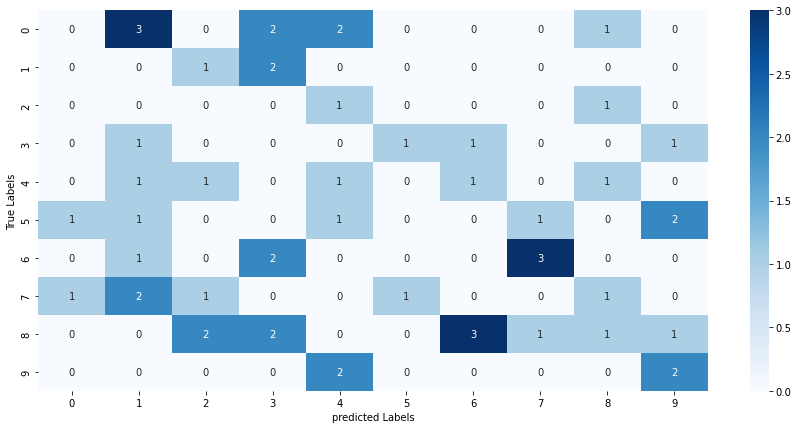

In [92]:
# Ploting Confusion Matrix
plt.figure(figsize=(15, 7))
sns.heatmap(conf_mat_cnn, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel("predicted Labels")

In [94]:
accuracy_score(y_test, y_pred_labels_cnn)
# print("CNN Accuracy: %.2f%%" % (scores[1]*100))

0.07407407407407407

In [98]:
cnn_model.evaluate(test_images, test_labels, verbose=0)

[0.00025974135496653616, 1.0]